# Assignment 2

### Implementing a CNN using tensorflow on the cifar10 dataset

Ajay Thorve

Titash Mandal

## Importing required Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
from scipy.ndimage import imread
import glob 
import sys
import pandas as pd
import math
import numpy as np
import h5py
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import sys,os

np.random.seed(1)

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Initializing the variables
labels_path = '/data/labels.txt'
sample_path = '/data/sampleSubmission.csv'
train_path = '/data/train/'
test_path = '/data/test/'

#Printing the labels to see what the output labels are
labels = pd.read_csv(labels_path,header=None)
print("First few elements : ")
labels= labels.to_dict()
labels=labels[0]
labels

First few elements : 


{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

<h1> Applying Image augmentation techniques</h1>

In [4]:
def flipping_Image(X_train):
    X_flipped_updown= []
    X_flipped_left_right= []
    X_contrasted=[]
    X_cropped = []
    X = tf.placeholder(tf.float32, shape = (32, 32, 3))
    
    X_flipped= tf.image.flip_up_down(X)
    
    X_flipped_sides= tf.image.flip_left_right(X)
    
    contrasting = tf.image.random_brightness(X, max_delta=0.2)
#     random_img_cropped = tf.random_crop(X,[24,24,3])
#     img_final = tf.image.resize_image_with_crop_or_pad(random_img_cropped,32,32)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for images in X_train:
            X_flipped_temp = sess.run(X_flipped,feed_dict={X:images})
            X_flipped_updown.append(X_flipped_temp)
            
            X_flipped_sides_temp = sess.run(X_flipped_sides, feed_dict={X:images})
            X_flipped_left_right.append(X_flipped_sides_temp)
            
            contrasting_temp = sess.run(contrasting,feed_dict={X:images})
            X_contrasted.append(contrasting_temp)
            
#             X_cropped_temp = sess.run(img_final,feed_dict={X:images})
#             X_cropped.append(X_cropped_temp)
            
    X_flipped_updown = np.asarray(X_flipped_updown)
    X_flipped_left_right = np.asarray(X_flipped_left_right)
    X_contrasted = np.asarray(X_contrasted)
    X_cropped = np.asarray(X_cropped)
    
    return X_flipped_updown,X_flipped_left_right,X_contrasted


<h1> Extracting the training examples first</h1>

In [5]:
def one_hot(y, num_classes=10):
    """
    Converts each label index in y to vector with one_hot encoding
    One-hot encoding converts categorical labels to binary values
    """

    y_one_hot = np.zeros((num_classes, y.shape[0]))
    y_one_hot[y, range(y.shape[0])] = 1
    print(y_one_hot.shape)
    return y_one_hot

def get_label(filepath):
    """
    Files are assumed to be labeled as: /path/to/file/999_frog.png
    Returns label for a filepath
    """
    tokens = filepath.split('/')
    label = tokens[-1].split('_')[1][:-4]
    return label

#Extracting the samples one by one
def get_images(path, image_type):
    X_train_list = []
    Y_train_list=[]
    #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, 
    #although results are returned in arbitrary order. 
    for filename in glob.glob(path + '/*'+ image_type):
        Y_train_list.append(get_label(filename))
        im=scipy.misc.imread(filename, mode='RGB')
        X_train_list.append(im)
    return X_train_list,Y_train_list

def get_image_test(path, image_type):
    X_test_list = []
    x_dict_temp ={}
    #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, 
    #although results are returned in arbitrary order. 
    for filename in glob.glob(path + '/*'+ image_type):
        im=scipy.misc.imread(filename, mode='RGB')
        y_temp = int(filename.split('/')[3].split('.')[0])
        temp_tuple = (y_temp,im)
        X_test_list.append(temp_tuple)
        X_dict = dict(X_test_list)
        x_dict_temp = dict(sorted(X_dict.items()))
    return np.array(list(x_dict_temp.values()))

In [6]:
X_train_list,Y_train_list=get_images(train_path, '.png')
X_train = np.array(X_train_list)
Y_train=np.array(Y_train_list)
X_test=get_image_test(test_path, '.png')

factor_value=pd.factorize(Y_train,sort=True)

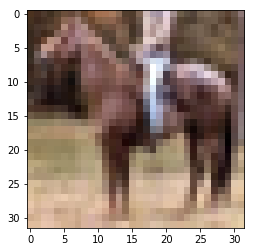

In [7]:
imshow(X_test[0])

### Displaying some images along with true labels from train set

In [8]:
def show_images():
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.6, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(X_train[i])
        
        # Name of the true class.
        cls_true_name = labels[factor_value[0][i]]
        xlabel = "class: {0}".format(cls_true_name)
        
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    return
# show_images()

In [ ]:
X_flipped_updown,X_flipped_left_right,X_contrasted=flipping_Image(X_train)

In [11]:
X_train_final = np.concatenate((X_train,X_flipped_updown,X_flipped_left_right,X_contrasted),axis=0)
X_train_final.shape

(180000, 32, 32, 3)

<h1>Extracting the labels for training examples</h1>

In [12]:

Y_train=one_hot(factor_value[0]).T
Y_train_final = np.concatenate((Y_train,Y_train,Y_train,Y_train),axis=0)

#Normalizing the images, creating a validation set and a training set

X_train_final_version = X_train_final[0:170000,:,:,:]/255
X_validate = X_train_final[170000:,:,:,:]/255
X_test=X_test/255
Y_train_final_version = Y_train_final[0:170000,:]
Y_validate = Y_train_final[170000:,:]

(10, 45000)


In [13]:
print("Dimension of X_train",X_train_final_version.shape)
print("Dimension of Y_train",Y_train_final_version.shape)

Dimension of X_train (170000, 32, 32, 3)
Dimension of Y_train (170000, 10)


In [14]:
print("Dimension of X_test",X_test.shape)
print("Dimension of X_validate",X_validate.shape)
print("Dimension of Y_validate",Y_validate.shape)

Dimension of X_test (5000, 32, 32, 3)
Dimension of X_validate (10000, 32, 32, 3)
Dimension of Y_validate (10000, 10)


## Helper Functions

### 1. Create Placeholders

In [28]:
def create_placeholders(m,n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """
    
    X = tf.placeholder(tf.float32, shape=(None, n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32, shape=(None, n_y))
    Istraining = tf.placeholder(tf.bool,shape=None)
    return X, Y,Istraining


### 2. Intialize Parameters

In [24]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
     
    parameters -- a dictionary of tensors containing W1, W2
    """
    #W1 is a dictionary of filters of shapes
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1", [3, 3, 3, 32], initializer = tf.contrib.layers.xavier_initializer(seed = 0))

    W2 = tf.get_variable("W2", [3, 3, 32, 32], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable("W3", [3, 3, 32, 64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W4 = tf.get_variable("W4", [3, 3, 64, 64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3,
                    "W4" :W4 }
    
    return parameters

### 3. Forward Propagation

In [49]:
def forward_propagation(X, parameters, Istraining):
    """
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    CON1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(CON1)
    
    tf.summary.histogram("W1-conv1",W1)
    
    # CONV2D: filters W2, stride 1, padding 'SAME'
    CON2 = tf.nn.conv2d(A1,W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(CON2)
    
    tf.summary.histogram("W2-conv2",W2)
    
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')
    D2 = tf.layers.dropout(P2,0.8,training=Istraining)
    
    # CONV2D: stride of 1, padding 'SAME'
    CON3 = tf.nn.conv2d(D2,W3, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A3 = tf.nn.relu(CON3)
    
    tf.summary.histogram("W3-conv3",W3)
    
    # CONV2D: filters W2, stride 1, padding 'SAME'
    CON4 = tf.nn.conv2d(A3,W4, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A3 = tf.nn.relu(CON4)
    
    tf.summary.histogram("W4-conv4",W4)
    
    P3 = tf.nn.max_pool(A3, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')
    D2 = tf.layers.dropout(P3,0.8,training=Istraining)
    
    FLAT1 = tf.contrib.layers.flatten(D2)
    Z3 = tf.contrib.layers.fully_connected(FLAT1, 512)
    Z4 = tf.contrib.layers.fully_connected(Z3, 10,activation_fn=None)
    y_pred = tf.nn.softmax(Z4,name="y_pred")
    

    return Z4

### 4. Computing the cost - softmax cross entropy

In [50]:
def compute_cost(Z4, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (10, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    #print("Inside compute_cost: Y.shape",Y.shape,"Z4.shape",Z4.shape)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z4, labels = Y))
    ### END CODE HERE ###
    
    return cost

### 5. Get batch() - as TF works with input batches, this function helps split input data set into small batches

In [51]:
 def get_batch(X, y, current_index,batch_size):
        """
        Return minibatch of samples and labels
        
        :param X, y: samples and corresponding labels
        :parma batch_size: minibatch size
        :returns: (tuple) X_batch, y_batch
        """
        X_batch,y_batch = X[current_index:current_index+batch_size,], y[current_index:current_index+batch_size]

        return X_batch, y_batch

### Create tensorflow graph

    1. Placeholder variables used for inputting data to the graph.
    2. Variables that are going to be optimized so as to make the convolutional network perform better.
    3. The mathematical formulas for the convolutional network.
    4. A loss measure that can be used to guide the optimization of the variables.
    5. An optimization method which updates the variables.

### Create a tensorflow session

### Restore or initialize variables

Training this neural network may take a long time, especially if you do not have a GPU. We therefore save checkpoints during training so we can continue training at another time (e.g. during the night), and also for performing analysis later without having to train the neural network every time we want to use it.

If you want to restart the training of the neural network, you have to delete the checkpoints first.

This is the directory used for the checkpoints.


In [52]:
save_dir = 'checkpoints_augment/'

#create the directory if it does not exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


This is the base-filename for the checkpoints, TensorFlow will append the iteration number, etc.

In [53]:
save_path = os.path.join(save_dir, 'cifar10_cnn_augment')



In [54]:
save_path

'checkpoints_augment/cifar10_cnn_augment'

First try to restore the latest checkpoint. This may fail and raise an exception e.g. if such a checkpoint does not exist, or if you have changed the TensorFlow graph.

In [55]:
ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
(m, n_H0, n_W0, n_C0) = X_train_final_version.shape             
n_y = Y_train_final_version.shape[1]
print("(m, n_H0, n_W0, n_C0,n_y)",m, n_H0, n_W0, n_C0,n_y)
costs = []                                        # To keep track of the cost

# Create Placeholders of the correct shape
X, Y,Istraining = create_placeholders(m,n_H0, n_W0, n_C0, n_y)

# Initialize parameters
parameters = initialize_parameters()

# Forward propagation: Build the forward propagation in the tensorflow graph
Z3 = forward_propagation(X, parameters,Istraining)

# Cost function: Add cost function to tensorflow graph
cost = compute_cost(Z3, Y)

global_step = tf.Variable(initial_value=0,
                          name='global_step', trainable=False)

# Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
optimizer = tf.train.AdamOptimizer(learning_rate=.001).minimize(cost,global_step=global_step)

saver = tf.train.Saver()

(m, n_H0, n_W0, n_C0,n_y) 170000 32 32 3 10


In [56]:
# Start the session to compute the tensorflow graph
sess = tf.Session()

In [57]:
summaries = tf.summary.merge_all()

In [73]:
train_writer = tf.summary.FileWriter('output_tb',sess.graph)

### 6. Model() - Implements a 3 layer ConvNet in TF

In [74]:
def model(X_train, Y_train,X_validate,Y_validate, learning_rate = 0.0001,num_epochs = 2, minibatch_size = 100, print_cost = True):
    seed = 3                                          # to keep results consistent (numpy seed)

    count=0
    
    num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
    # Do the training loop

    for epoch in range(num_epochs):
        current_index=0
        count+=1
        for each_batch in range(num_minibatches):

            minibatch_cost = 0.
            seed = seed + 1
            # Select a minibatch
            (minibatch_X, minibatch_Y) = get_batch(X_train, Y_train,current_index, 200)
    #                 print("minibatch_X",minibatch_X.shape,"minibatch_Y",minibatch_Y.shape)
            current_index+=100
            # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
            i_global,_ , temp_cost = sess.run([global_step,optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y, Istraining: True})

            minibatch_cost += temp_cost / num_minibatches
            if each_batch%100 == 0:
                print('.',end='')

    #       Print the cost every epoch
        if print_cost == True and epoch % 1 == 0:
            
            summary_str = sess.run(summaries,feed_dict={X:minibatch_X, Y:minibatch_Y, Istraining: True})
            train_writer.add_summary(summary_str,global_step=i_global)
            
            g_epoch = i_global/(X_train.shape[0]/minibatch_size)
            print ("\nCost after epoch(global) %i: %f" % (g_epoch, minibatch_cost))
            saver.save(sess,save_path = save_path,global_step=global_step)
            print("saved to",save_path)
            print("i_global",i_global)
            
            graph = tf.get_default_graph()
            y_pred = graph.get_tensor_by_name("y_pred:0")
            
            res = sess.run(y_pred,feed_dict={X:X_test,Istraining: False})
            predict_op = tf.argmax(res, 1)
            predict_op = (predict_op.eval(session=sess))
            correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            val_accuracy = accuracy.eval(feed_dict={X:X_test,Y: Y_finals,Istraining: False},session=sess)
            print("Validation Accuracy:", val_accuracy)
            
        if print_cost == True and epoch % 1 == 0:
            costs.append(minibatch_cost)

In [75]:
try:
    print("Trying to restore last checkpoint ...")

    # Use TensorFlow to find the latest checkpoint - if any.
    last_chk_path = tf.train.latest_checkpoint(checkpoint_dir=save_dir)

    # Try and load the data in the checkpoint.
    saver.restore(sess, save_path=last_chk_path)

    # If we get to this point, the checkpoint was successfully loaded.
    print("Restored checkpoint from:", last_chk_path)
except:
    # If the above failed for some reason, simply
    # initialize all the variables for the TensorFlow graph.
    print("Failed to restore checkpoint. Initializing variables instead.",sys.exc_info()[0])
    sess.run(tf.global_variables_initializer())

Trying to restore last checkpoint ...
INFO:tensorflow:Restoring parameters from checkpoints_augment/cifar10_cnn_augment-13600
Restored checkpoint from: checkpoints_augment/cifar10_cnn_augment-13600


In [76]:
sess.run(tf.global_variables_initializer())

## Run the TF CNN model

In [77]:
model(X_train_final_version, Y_train_final_version,X_validate,Y_validate)

.................
Cost after epoch(global) 1: 0.000729
saved to checkpoints_augment/cifar10_cnn_augment
i_global 1700
Validation Accuracy: 0.4978
...............

KeyboardInterrupt: 

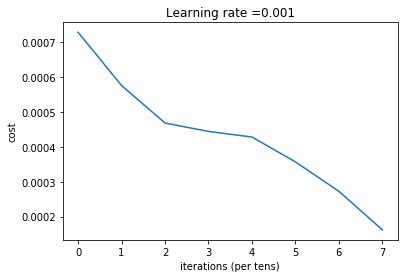

In [66]:
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(0.001))
plt.show()

<h1>Testing</h1>

## Prediction and final csv generation

In [67]:
# Use TensorFlow to find the latest checkpoint - if any.
last_chk_path = tf.train.latest_checkpoint(checkpoint_dir=save_dir)

# Try and load the data in the checkpoint.
saver.restore(sess, save_path=last_chk_path)

# If we get to this point, the checkpoint was successfully loaded.
print("Restored checkpoint from:", last_chk_path)



INFO:tensorflow:Restoring parameters from checkpoints_augment/cifar10_cnn_augment-13600
Restored checkpoint from: checkpoints_augment/cifar10_cnn_augment-13600


In [69]:
val_accuracy

0.7418

In [48]:
# Use TensorFlow to find the latest checkpoint - if any.
last_chk_path = tf.train.latest_checkpoint(checkpoint_dir=save_dir)

# Try and load the data in the checkpoint.
saver.restore(sess, save_path=last_chk_path)

# If we get to this point, the checkpoint was successfully loaded.
print("Restored checkpoint from:", last_chk_path)




graph = tf.get_default_graph()

y_pred = graph.get_tensor_by_name("y_pred:0")

feed_dict_testing = {X: X_test,Istraining: False}

result=sess.run(y_pred, feed_dict=feed_dict_testing)

predict_op = tf.argmax(result, 1)

final_list= predict_op.eval(session=sess)

s= ""
s = s+"id,label\n"
for i in range(1,5001):
    s=s+str(str(i-1)+","+labels[final_list[i-1]]+"\n")

f = open('Final_Submission.csv','w')
f.write(s)
f.close()

INFO:tensorflow:Restoring parameters from checkpoints_augment/cifar10_cnn_augment-88400
Restored checkpoint from: checkpoints_augment/cifar10_cnn_augment-88400
